In [1]:
from tensorflow.python.keras.applications import VGG16

conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(100,100,3))

In [2]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [3]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [4]:
import os
import numpy as np
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [5]:
from tensorflow.python.keras import models
from tensorflow.python.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(72, activation='softmax'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1179904   
_________________________________________________________________
dense_1 (Dense)              (None, 72)                18504     
Total params: 15,913,096
Trainable params: 8,277,832
Non-trainable params: 7,635,264
_________________________________________________________________


In [7]:
train_dir='C:\\Users\\Raheel\\fruits_classification\\fruits-360_dataset\\fruits-360\\Training'

In [8]:
validation_dir='C:\\Users\\Raheel\\fruits_classification\\fruits-360_dataset\\fruits-360\\Test'

In [9]:
from tensorflow.python.keras import optimizers

model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['categorical_accuracy'])

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(100, 100),
        batch_size=32)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=32, shuffle=False)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 36117 images belonging to 72 classes.
Found 12132 images belonging to 72 classes.
Epoch 1/100
100/100 [==============================] - 17s 172ms/step - loss: 4.1885 - categorical_accuracy: 0.0569 - val_loss: 4.2147 - val_categorical_accuracy: 6.2500e-04
Epoch 2/100
100/100 [==============================] - 14s 144ms/step - loss: 3.6291 - categorical_accuracy: 0.1750 - val_loss: 3.7689 - val_categorical_accuracy: 0.0750
Epoch 3/100
100/100 [==============================] - 14s 144ms/step - loss: 2.9876 - categorical_accuracy: 0.3044 - val_loss: 3.4016 - val_categorical_accuracy: 0.2213
Epoch 4/100
100/100 [==============================] - 15s 151ms/step - loss: 2.4297 - categorical_accuracy: 0.4232 - val_loss: 2.7159 - val_categorical_accuracy: 0.2731
Epoch 5/100
100/100 [==============================] - 15s 145ms/step - loss: 1.9994 - categorical_accuracy: 0.5153 - val_loss: 2.5751 - val_categorical_accuracy: 0.2969
Epoch 6/100
100/100 [==============================] - 14s

100/100 [==============================] - 18s 180ms/step - loss: 0.0903 - categorical_accuracy: 0.9684 - val_loss: 0.1941 - val_categorical_accuracy: 0.9337
Epoch 49/100
100/100 [==============================] - 18s 180ms/step - loss: 0.0837 - categorical_accuracy: 0.9769 - val_loss: 0.2472 - val_categorical_accuracy: 0.9125
Epoch 50/100
100/100 [==============================] - 20s 198ms/step - loss: 0.0855 - categorical_accuracy: 0.9728 - val_loss: 0.1851 - val_categorical_accuracy: 0.9269
Epoch 51/100
100/100 [==============================] - 44s 442ms/step - loss: 0.0758 - categorical_accuracy: 0.9769 - val_loss: 0.0949 - val_categorical_accuracy: 0.9700
Epoch 52/100
100/100 [==============================] - 33s 334ms/step - loss: 0.0751 - categorical_accuracy: 0.9750 - val_loss: 0.1797 - val_categorical_accuracy: 0.9250
Epoch 53/100
100/100 [==============================] - 18s 180ms/step - loss: 0.0765 - categorical_accuracy: 0.9756 - val_loss: 0.2762 - val_categorical_accu

Epoch 96/100
100/100 [==============================] - 19s 192ms/step - loss: 0.0372 - categorical_accuracy: 0.9875 - val_loss: 0.1742 - val_categorical_accuracy: 0.9350
Epoch 97/100
100/100 [==============================] - 19s 190ms/step - loss: 0.0506 - categorical_accuracy: 0.9813 - val_loss: 0.0446 - val_categorical_accuracy: 0.9900
Epoch 98/100
100/100 [==============================] - 18s 181ms/step - loss: 0.0297 - categorical_accuracy: 0.9912 - val_loss: 0.4592 - val_categorical_accuracy: 0.8725
Epoch 99/100
100/100 [==============================] - 19s 191ms/step - loss: 0.0373 - categorical_accuracy: 0.9866 - val_loss: 0.0537 - val_categorical_accuracy: 0.9862
Epoch 100/100
100/100 [==============================] - 18s 180ms/step - loss: 0.0457 - categorical_accuracy: 0.9831 - val_loss: 0.0819 - val_categorical_accuracy: 0.9706


In [11]:
model.save('fruits_360_vgg16_fine_tuning_data_augmentation.h5')

In [12]:
import matplotlib.pyplot as plt

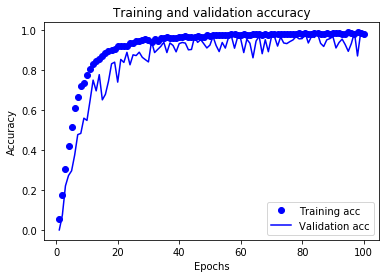

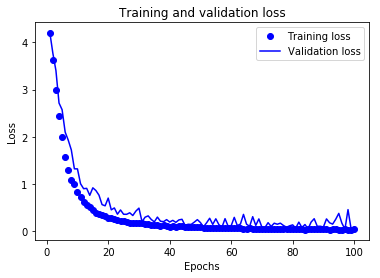

In [13]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('fruit_image_classification_using vgg16_fine tuning_data augmentation_RMSprop3A',format='png')
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('fruit_image_classification_using vgg16_fine tuning_data augmentation_RMSprop3B',format='png')
plt.show()

In [14]:
steps_test=12132/32

In [15]:
print(steps_test)

379.125


In [16]:
result = model.evaluate_generator(validation_generator, steps=steps_test)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

Test-set classification accuracy: 98.01%
